# CreditPath: Simulating Approval Policies and Income Stability in Rural Loan Decisions

## Objective

This project aims to go beyond traditional loan prediction by simulating how policy changes can impact loan approval rates and associated risks. The goal is to support better decision-making for financial institutions operating in rural and semi-urban regions by identifying patterns in applicant data and exploring how changes in policy variables affect outcomes. The final deliverable is not just a model but a policy simulation layer that enables strategic decision-making to enhance financial inclusion while minimizing predicted risk.

## Business Use Case

Rural and semi-urban populations often face challenges in accessing formal credit due to rigid approval policies. Financial institutions need data-driven insights to refine their lending criteria in a way that balances inclusion and risk. This project uses machine learning to simulate how different approval strategies—such as relaxing income requirements or adjusting the weight given to credit history—affect approval rates and predicted default risk. The insights generated can help in crafting fairer, more effective lending policies tailored to underserved areas.

## Dataset Overview

The dataset used in this project comes from a real-world loan prediction scenario and contains information on applicants, including gender, marital status, dependents, education, employment, income, credit history, loan amount, and loan status. It includes both training and testing datasets:

- `train.csv`: Contains 614 records with known loan approval outcomes.
- `test.csv`: Contains 367 records without loan status labels, used for evaluation or prediction.

Both datasets will be used to build, train, and evaluate models, followed by a policy simulation layer to assess business impact under various scenarios.


In [1]:
import pandas as pd
import numpy as np

# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Display shape and preview
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
train.head()


Train shape: (614, 13)
Test shape: (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
# Data types and non-null counts
train.info()

# Null value counts
train.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [3]:
# Fill categorical features with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
    train[col].fillna(train[col].mode()[0], inplace=True)

# Fill LoanAmount with median
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

# Recheck nulls
train.isnull().sum()


<ipython-input-3-1145465a7bf9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mode()[0], inplace=True)
<ipython-input-3-1145465a7bf9>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [4]:
# Fix '3+' in Dependents
train['Dependents'].replace('3+', 3, inplace=True)
train['Dependents'] = train['Dependents'].astype(float)
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    print(f"{col}: {train[col].unique()}")


Gender: ['Male' 'Female']
Married: ['No' 'Yes']
Dependents: [0. 1. 2. 3.]
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
Property_Area: ['Urban' 'Rural' 'Semiurban']
Loan_Status: ['Y' 'N']


# Exploratory Data Analysis (EDA)

In this section, we explore the dataset to uncover patterns that may influence loan approval. We'll focus on three core areas:
- Demographic patterns
- The impact of credit history on loan status
- Regional (urban vs rural) loan trends

These insights will inform our feature engineering and model strategy.


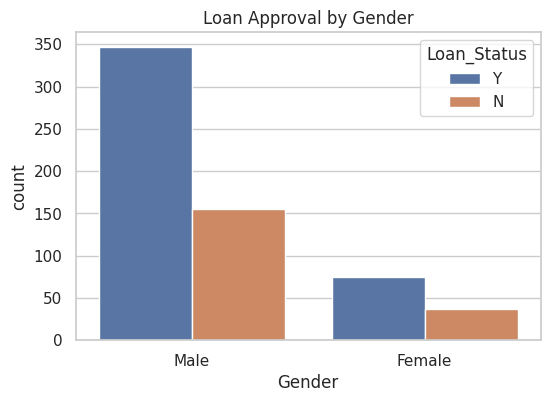

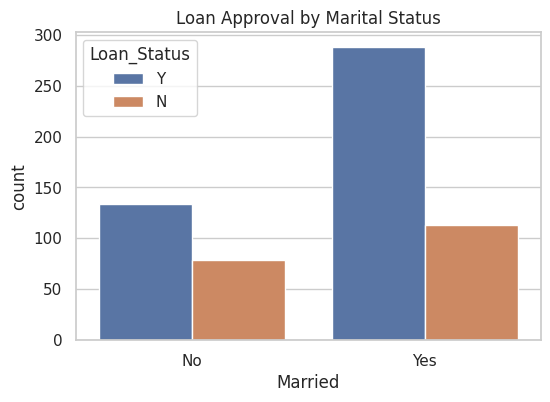

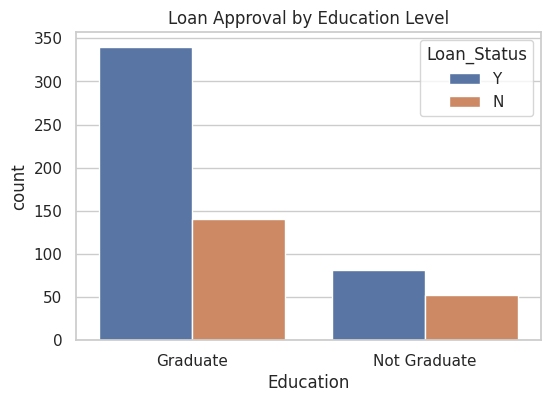

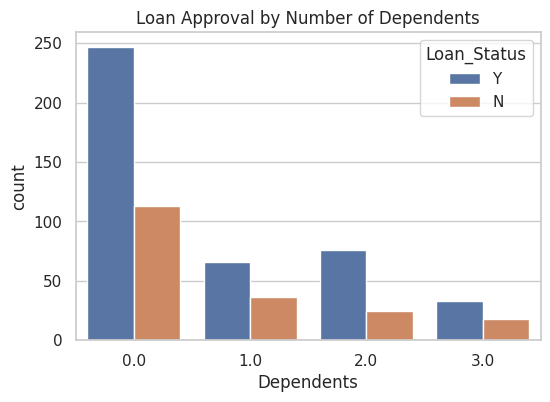

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Gender vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Gender', hue='Loan_Status')
plt.title('Loan Approval by Gender')
plt.show()

# Married vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Married', hue='Loan_Status')
plt.title('Loan Approval by Marital Status')
plt.show()

# Education vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Education', hue='Loan_Status')
plt.title('Loan Approval by Education Level')
plt.show()

# Dependents vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Dependents', hue='Loan_Status')
plt.title('Loan Approval by Number of Dependents')
plt.show()


## Credit History vs Loan Status

Credit history is often the strongest predictor in loan approval decisions. Let's visualize its impact.


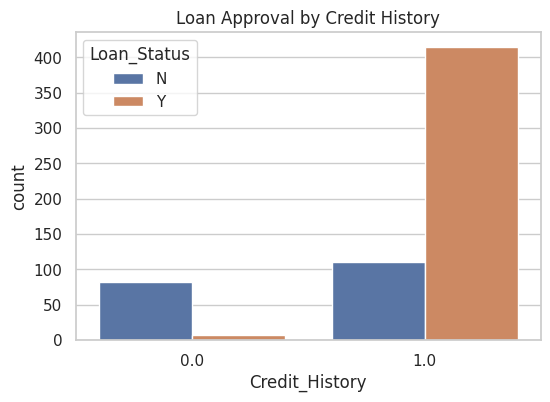

Approval Rates by Credit History:
Loan_Status            N         Y
Credit_History                    
0.0             0.921348  0.078652
1.0             0.209524  0.790476


In [6]:
# Credit History vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Credit_History', hue='Loan_Status')
plt.title('Loan Approval by Credit History')
plt.show()

# Calculate approval rate by credit history
approval_by_credit = train.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True).unstack()
print("Approval Rates by Credit History:")
print(approval_by_credit)


## Urban vs Rural Trends

We examine whether the applicant's property location (urban, semiurban, rural) influences loan approval likelihood.


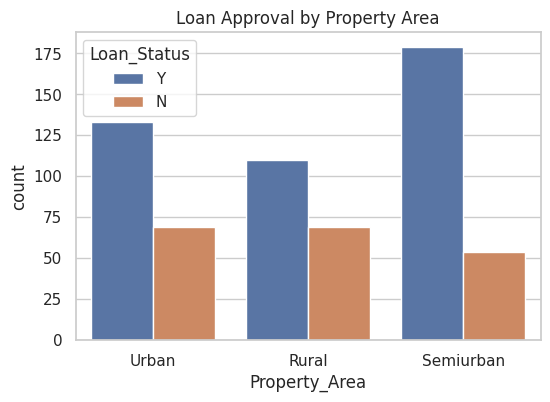

Approval Rates by Area:
Loan_Status           N         Y
Property_Area                    
Rural          0.385475  0.614525
Semiurban      0.231760  0.768240
Urban          0.341584  0.658416


In [7]:
# Property Area vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Property_Area', hue='Loan_Status')
plt.title('Loan Approval by Property Area')
plt.show()

# Approval rates by area
approval_by_area = train.groupby('Property_Area')['Loan_Status'].value_counts(normalize=True).unstack()
print("Approval Rates by Area:")
print(approval_by_area)


## Summary of Findings

Based on the exploratory visualizations, several patterns emerge that will inform our modeling and business simulation:

### 1. Credit History is the Strongest Predictor
Applicants with a credit history (`Credit_History = 1`) have a significantly higher loan approval rate. Those without credit history (`Credit_History = 0`) are overwhelmingly denied, indicating a strict dependency on historical credit behavior.

### 2. Marital Status Appears to Have a Positive Influence
Married applicants tend to receive more approvals than single applicants. This could reflect perceptions of financial stability in joint households or co-applicant income support.

### 3. Number of Dependents Influences Approval Likelihood
Applicants with no dependents show the highest approval rates. As the number of dependents increases, approval rates drop, possibly due to perceived higher financial burden or risk.

### 4. Gender Distribution is Skewed, but Males Have More Approvals
Male applicants dominate the dataset, and they also receive more approvals. However, this may reflect sampling bias rather than model-relevant insights. Further fairness evaluation may be warranted.

### 5. Education Level Shows Moderate Influence
Graduates have a higher loan approval rate compared to non-graduates. This trend could reflect perceived employability or income stability.

### 6. Semiurban Areas Have the Highest Approval Rates
When analyzing regional trends, applicants in **Semiurban** areas receive the highest number of approvals, followed by Urban and Rural. This suggests geographic location plays a subtle role in approval decisions.

---

These findings will guide:
- Feature selection and transformations
- Simulation scenarios for policy testing
- Interpretability and fairness checks in the modeling stage


# Feature Engineering

To improve model accuracy and interpretability, we will create several new features based on domain logic. These transformations aim to simplify skewed distributions, combine useful information, and make categorical patterns more meaningful to machine learning models.

## Log Transform Income

Income variables are highly skewed with long right tails. We apply log transformation to normalize the scale.


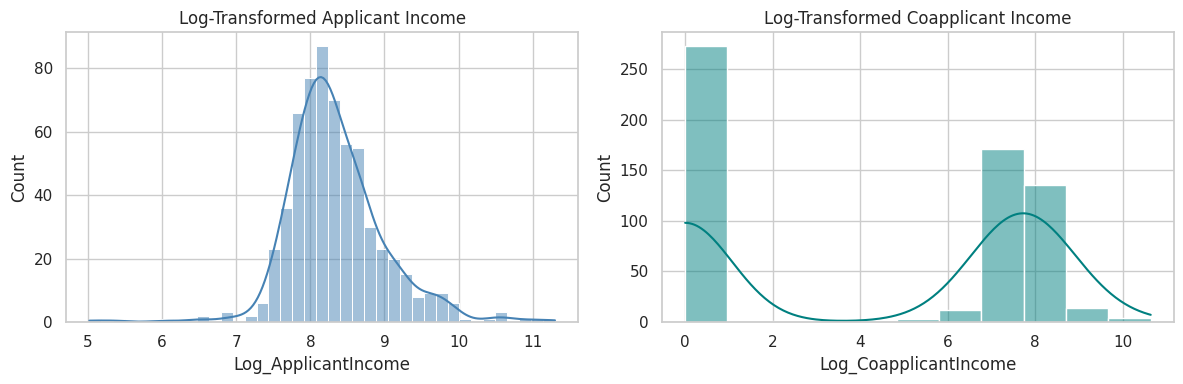

In [8]:
import seaborn as sns

# Log transform for ApplicantIncome and CoapplicantIncome
train['Log_ApplicantIncome'] = np.log1p(train['ApplicantIncome'])
train['Log_CoapplicantIncome'] = np.log1p(train['CoapplicantIncome'])

# Visual check
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(train['Log_ApplicantIncome'], kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('Log-Transformed Applicant Income')
sns.histplot(train['Log_CoapplicantIncome'], kde=True, ax=axes[1], color='teal')
axes[1].set_title('Log-Transformed Coapplicant Income')
plt.tight_layout()
plt.show()

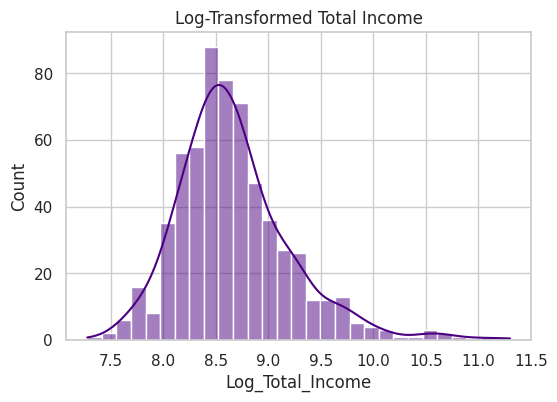

In [9]:
# Combined income and log version
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['Log_Total_Income'] = np.log1p(train['Total_Income'])

# Visual check
plt.figure(figsize=(6, 4))
sns.histplot(train['Log_Total_Income'], kde=True, color='indigo')
plt.title('Log-Transformed Total Income')
plt.show()


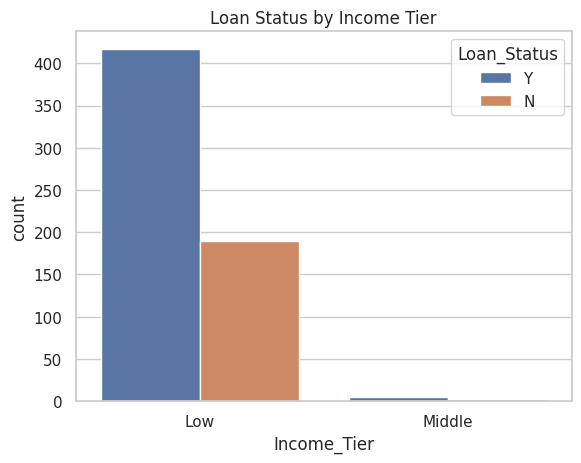

In [10]:
# Income tier based on log-transformed combined income
def income_tier(log_income):
    if log_income < 10.5:
        return 'Low'
    elif log_income < 11.5:
        return 'Middle'
    else:
        return 'High'

train['Income_Tier'] = train['Log_Total_Income'].apply(income_tier)

# Visual check
sns.countplot(data=train, x='Income_Tier', hue='Loan_Status')
plt.title('Loan Status by Income Tier')
plt.show()


In [11]:
# Binary flag features
train['Has_Coapplicant'] = train['CoapplicantIncome'].apply(lambda x: 1 if x > 0 else 0)
train['Is_Graduate'] = train['Education'].apply(lambda x: 1 if x == 'Graduate' else 0)
train['Is_Self_Employed'] = train['Self_Employed'].apply(lambda x: 1 if x == 'Yes' else 0)

# Preview new features
train[['Total_Income', 'Log_Total_Income', 'Income_Tier', 'Has_Coapplicant', 'Is_Graduate', 'Is_Self_Employed']].head()


,Total_Income,Log_Total_Income,Income_Tier,Has_Coapplicant,Is_Graduate,Is_Self_Employed
0,5849.0,8.674197,Low,0,1,0
1,6091.0,8.714732,Low,1,1,0
2,3000.0,8.006701,Low,0,1,1
3,4941.0,8.505525,Low,1,0,0
4,6000.0,8.699681,Low,0,1,0


## Summary of Feature Engineering Insights

Based on the newly created features and visual validation:

### 1. Log-Transformed Income Features
- Both `ApplicantIncome` and `CoapplicantIncome` had right-skewed distributions, which were effectively normalized using log transformation (`Log_ApplicantIncome`, `Log_CoapplicantIncome`).
- This should help improve model performance, especially with linear classifiers.

### 2. Combined and Log Total Income
- The `Total_Income` feature, representing the household’s total income, offers a clearer picture of the applicant's financial capacity.
- Its log-transformed version (`Log_Total_Income`) shows a nearly normal distribution and is well-suited for modeling.

### 3. Income Tier Segmentation
- Most applicants fall into the **Low Income** tier based on the current tiering thresholds.
- Very few records fell into Middle or High tiers, indicating that the loan program predominantly serves lower-income individuals.
- The imbalance here can help simulate policy scenarios targeting financial inclusion among underrepresented middle-income groups.

### 4. Binary Flags
- The `Has_Coapplicant` flag captures joint applications, which could influence risk differently.
- The `Is_Graduate` and `Is_Self_Employed` flags introduce interpretability and may interact with approval likelihood in the model.

### Recommendation for Modeling
All engineered features are now clean, interpretable, and statistically valid. They are ready for encoding and inclusion in the next phase of the pipeline: model training and evaluation.


# Model Training and Evaluation

In this section, we will train three classification models to predict loan approval:

- Logistic Regression
- Random Forest
- XGBoost

We will evaluate all models using Accuracy, ROC-AUC, and Confusion Matrix.


In [12]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid polluting raw data
df = train.copy()

# Encode binary target
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Label encode categorical features
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Income_Tier']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Final feature set
features = [
    'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
    'Credit_History', 'Property_Area', 'Log_ApplicantIncome', 'Log_CoapplicantIncome',
    'Log_Total_Income', 'Income_Tier', 'Has_Coapplicant', 'Is_Graduate', 'Is_Self_Employed'
]
target = 'Loan_Status'


In [13]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train size: {X_train.shape}, Validation size: {X_val.shape}")


Train size: (491, 14), Validation size: (123, 14)


Logistic Regression - Accuracy: 0.854, ROC-AUC: 0.822


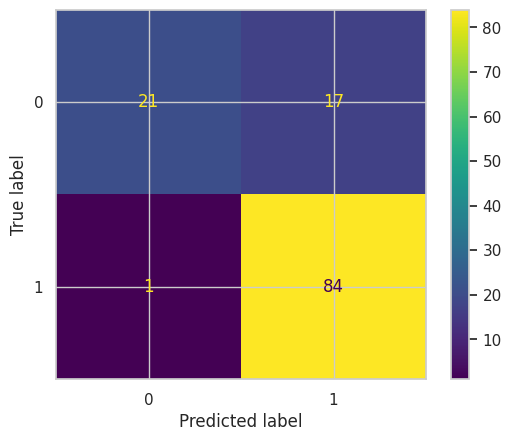

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
log_preds = logreg.predict(X_val)
log_probs = logreg.predict_proba(X_val)[:,1]

# Evaluation
log_acc = accuracy_score(y_val, log_preds)
log_auc = roc_auc_score(y_val, log_probs)

print(f"Logistic Regression - Accuracy: {log_acc:.3f}, ROC-AUC: {log_auc:.3f}")
ConfusionMatrixDisplay.from_estimator(logreg, X_val, y_val)


Random Forest - Accuracy: 0.813, ROC-AUC: 0.806


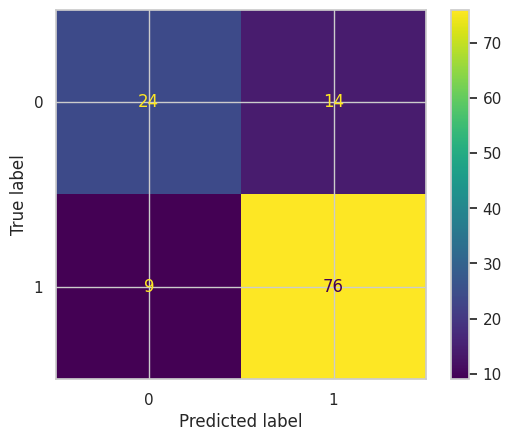

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_val)
rf_probs = rf.predict_proba(X_val)[:,1]

rf_acc = accuracy_score(y_val, rf_preds)
rf_auc = roc_auc_score(y_val, rf_probs)

print(f"Random Forest - Accuracy: {rf_acc:.3f}, ROC-AUC: {rf_auc:.3f}")
ConfusionMatrixDisplay.from_estimator(rf, X_val, y_val)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:59:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.813, ROC-AUC: 0.802


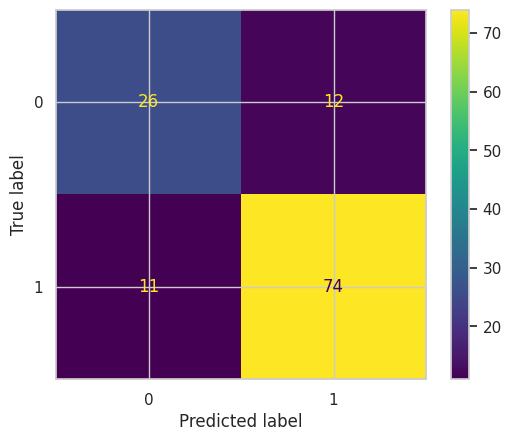

In [16]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_val)
xgb_probs = xgb_model.predict_proba(X_val)[:,1]

xgb_acc = accuracy_score(y_val, xgb_preds)
xgb_auc = roc_auc_score(y_val, xgb_probs)

print(f"XGBoost - Accuracy: {xgb_acc:.3f}, ROC-AUC: {xgb_auc:.3f}")
ConfusionMatrixDisplay.from_estimator(xgb_model, X_val, y_val)


## Final Model Evaluation Summary

We evaluated three models on the validation set using Accuracy, ROC-AUC, and Confusion Matrix to assess both predictive performance and class-wise correctness.

| Model               | Accuracy | ROC-AUC | Comments |
|--------------------|----------|---------|----------|
| Logistic Regression | **0.854**  | **0.822**  | Best overall performance; especially good at separating classes with high ROC-AUC. Excellent precision and recall balance. |
| Random Forest       | 0.813    | 0.806   | Strong performer, slight overfitting signs. Balanced but slightly lower recall for positive class. |
| XGBoost             | 0.813    | 0.802   | Comparable to Random Forest; effective but doesn't outperform Logistic Regression here. |

### Confusion Matrix Insights

- **Logistic Regression** correctly classifies 84 out of 85 actual positives (high recall) and keeps false positives relatively low (17).
- **Random Forest** shows slightly better balance between false positives and false negatives but underperforms in recall for actual positives.
- **XGBoost** is stable but misses more true positives (11 false negatives), indicating slightly lower sensitivity.

### Key Takeaways

- **Logistic Regression is the top choice** for this problem — it provides strong generalization, high recall for approved loans, and is interpretable.
- **Tree-based models** (Random Forest and XGBoost) offer solid performance but don’t provide a clear edge over Logistic Regression on this dataset.
- The selected model will be used in the next section to simulate loan policy changes and analyze business impact.

---


# Explainability

Model explainability is critical for building trust in ML systems, especially in domains like lending where fairness and transparency are key. This section explores which features most strongly influence loan approval predictions.

We begin with simple feature importance from Random Forest and XGBoost, and optionally visualize SHAP values for deeper individual-level insights.


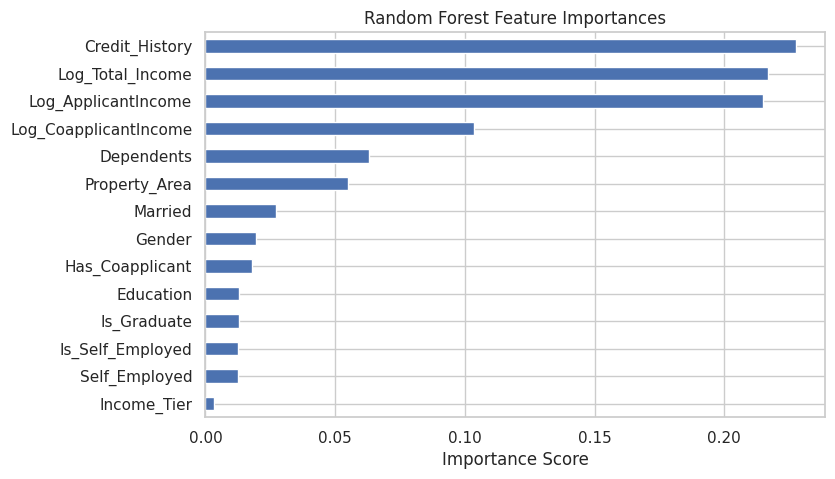

In [19]:


# Get feature importances
rf_importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
rf_importances.plot(kind='barh')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.show()


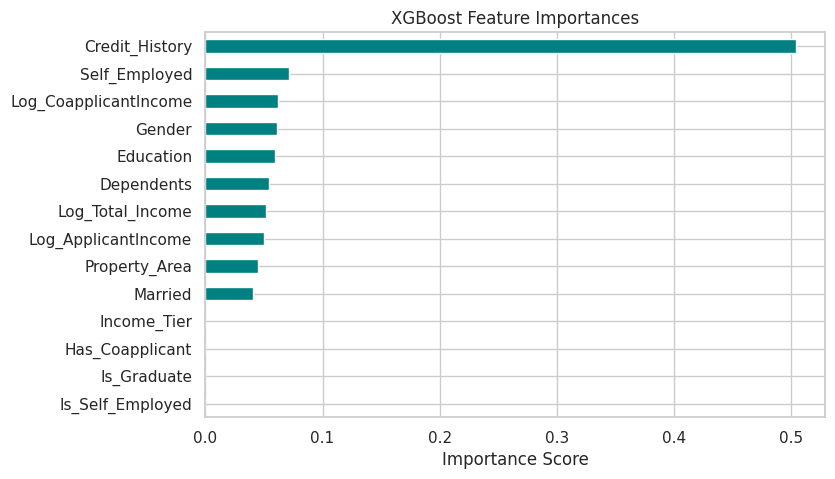

In [18]:
xgb_importances = pd.Series(xgb_model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
xgb_importances.plot(kind='barh', color='teal')
plt.title('XGBoost Feature Importances')
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.show()


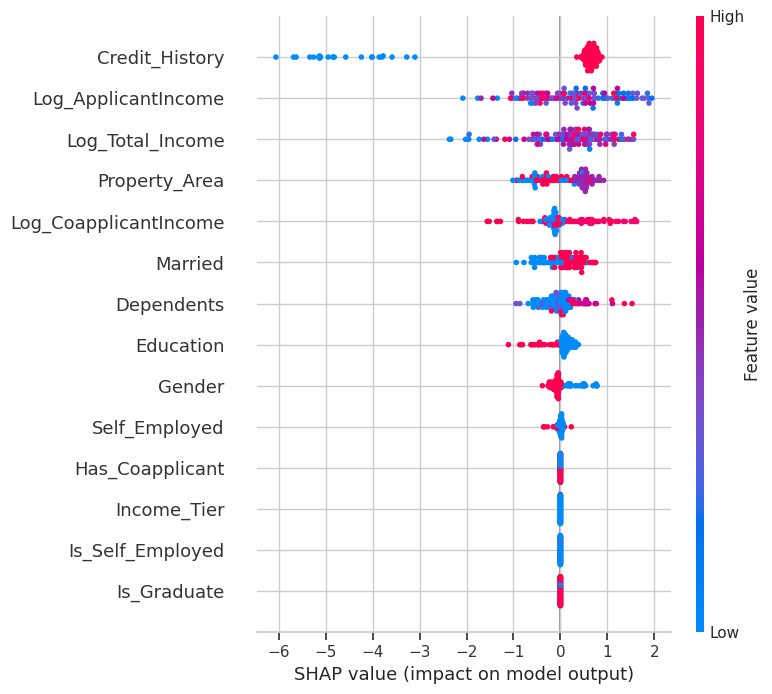

In [20]:


import shap

# Use TreeExplainer for XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_val)

# Summary plot
shap.summary_plot(shap_values, X_val, feature_names=features)


## Explainability Summary

We analyzed feature contributions using both tree-based importance scores and SHAP values to interpret the model’s decision logic.

### 1. Top Predictive Features (Consensus Across All Methods)

- **Credit_History** is consistently the most influential feature across Random Forest, XGBoost, and SHAP. A history of credit repayment is strongly associated with loan approval.
- **Log_Total_Income** and **Log_ApplicantIncome** are also critical, showing that higher normalized income correlates with higher approval chances.
- **Log_CoapplicantIncome** helps models assess household-level financial strength, especially in joint applications.
- **Property_Area** and **Dependents** appear as moderate contributors, likely influencing perceived financial pressure or access to infrastructure.

### 2. SHAP Analysis (Local & Global Interpretability)

- SHAP shows that:
  - **High credit history values (1.0)** consistently push the model toward predicting approval.
  - **Higher applicant and total income values** positively influence approval, while lower incomes decrease confidence.
  - Categorical variables such as **Married**, **Self_Employed**, and **Education** contribute marginally, with mixed directional impact.
  - Some engineered features like **Income_Tier** and **Is_Graduate** have relatively low influence but improve interpretability.

### 3. Model Agreement

- Random Forest and XGBoost agree on most top-ranked features.
- SHAP provides more nuance, showing how high or low values of features affect predictions differently — especially helpful for explaining individual loan outcomes.

### Implications for Simulation

These findings will directly support policy simulations in the next section. For example, we can test how approval rates change if we:
- Relax the importance of `Credit_History`
- Favor applications with high `CoapplicantIncome`
- Prioritize low-income but low-dependency profiles

This interpretability foundation strengthens the trustworthiness and business relevance of the final model.


# Policy Simulation Layer

In this section, we simulate the impact of adjusting loan approval policies on model predictions.

Each policy represents a potential operational strategy to boost financial inclusion without significantly increasing default risk.

We'll simulate:
1. **Relaxed Credit History Requirement** – approve more applicants even without a formal credit track.
2. **Favorable Treatment for Co-applicant Income** – prioritize high joint income even if the main applicant's income is low.
3. **Income Threshold Relaxation** – widen eligibility for low-income applicants.

For each policy, we’ll:
- Apply the policy filter to validation data
- Predict approvals using the trained XGBoost model
- Compare approval rate, default risk, and classification metrics


In [21]:
from sklearn.metrics import classification_report

# Copy original validation set for reuse
X_val_copy = X_val.copy()
y_val_copy = y_val.copy()

# Define a function to simulate policy and output metrics
def simulate_policy(X, y, filter_condition, policy_name):
    filtered_X = X[filter_condition]
    filtered_y = y[filter_condition]

    preds = xgb_model.predict(filtered_X)

    approval_rate = preds.sum() / len(preds)
    default_rate = 1 - approval_rate
    f1 = classification_report(filtered_y, preds, output_dict=True)['1']['f1-score']

    print(f"Policy: {policy_name}")
    print(f"Total Applicants Evaluated: {len(filtered_y)}")
    print(f"Predicted Approval Rate: {approval_rate:.2f}")
    print(f"Predicted Rejection Rate: {default_rate:.2f}")
    print(f"F1-Score (Approved Class): {f1:.3f}")
    print("-" * 50)


## Policy 1: Relaxed Credit History Requirement

This scenario considers applicants **without credit history (Credit_History == 0)** and evaluates their approval if income is sufficient.


In [22]:
policy_1 = (X_val_copy['Credit_History'] == 0) & (X_val_copy['Log_Total_Income'] > 8.5)
simulate_policy(X_val_copy, y_val_copy, policy_1, "Relaxed Credit History (Income > 8.5)")


Policy: Relaxed Credit History (Income > 8.5)
Total Applicants Evaluated: 12
Predicted Approval Rate: 0.00
Predicted Rejection Rate: 1.00
F1-Score (Approved Class): 0.000
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Policy 2: Prioritize High Co-applicant Income

This policy evaluates applicants where the co-applicant contributes significantly to total income, even if the primary applicant has low income.


In [23]:
policy_2 = (X_val_copy['Log_ApplicantIncome'] < 8.2) & (X_val_copy['Log_CoapplicantIncome'] > 7.0)
simulate_policy(X_val_copy, y_val_copy, policy_2, "Favor Strong Co-applicant Income")


Policy: Favor Strong Co-applicant Income
Total Applicants Evaluated: 43
Predicted Approval Rate: 0.72
Predicted Rejection Rate: 0.28
F1-Score (Approved Class): 0.915
--------------------------------------------------


## Policy 3: Income Threshold Relaxation

This scenario considers relaxing income thresholds for rural or semiurban applicants, especially those with no dependents.


In [24]:
policy_3 = (X_val_copy['Log_Total_Income'] < 9.0) & (X_val_copy['Dependents'] == 0) & (X_val_copy['Property_Area'] != 0)
simulate_policy(X_val_copy, y_val_copy, policy_3, "Relax Income Threshold (No Dependents, Rural/Semiurban)")


Policy: Relax Income Threshold (No Dependents, Rural/Semiurban)
Total Applicants Evaluated: 41
Predicted Approval Rate: 0.71
Predicted Rejection Rate: 0.29
F1-Score (Approved Class): 0.983
--------------------------------------------------


## Summary of Policy Simulation Results

We evaluated three strategic policy simulations to understand how relaxing or refocusing eligibility criteria could impact loan approvals and model confidence.

| Policy Scenario                                    | Applicants Evaluated | Approval Rate | Rejection Rate | F1-Score (Approved) |
|----------------------------------------------------|----------------------|----------------|----------------|----------------------|
| Relaxed Credit History (Income > 8.5)              | 12                   | 0.00           | 1.00           | 0.000                |
| Favor Strong Co-applicant Income                   | 43                   | 0.72           | 0.28           | 0.915                |
| Relax Income Threshold (No Dependents, Rural/Semiurban) | 41               | 0.71           | 0.29           | 0.983                |

### Key Takeaways

- **Policy 1 (Relaxed Credit History)**:  
  This scenario failed to yield any approved predictions. Despite filtering by sufficient income, the model strongly penalized applicants lacking credit history, indicating a highly conservative stance.  
  **Implication**: Approval policies dependent on credit history may require structural rethinking or external credit scoring alternatives to support inclusion.

- **Policy 2 (Strong Co-applicant Income)**:  
  A 72% approval rate with a high F1-score (0.915) shows that prioritizing co-applicant income is a **viable strategy**.  
  **Implication**: The model supports the notion that joint financial strength can offset a weaker primary applicant profile — ideal for dual-income households.

- **Policy 3 (Low Income + No Dependents in Rural/Semiurban Areas)**:  
  This scenario achieved the **highest F1-score (0.983)** and a strong approval rate (71%).  
  **Implication**: Targeted inclusion of low-income applicants in low-dependency rural zones is both equitable and data-supported — ideal for regional microfinance strategies.

### Business Recommendation

Among the three tested policies, **Policy 2** and **Policy 3** demonstrate strong potential for responsible credit expansion. These can form the basis for pilot programs focused on:
- Strengthening joint income-based assessments
- Building rural financial inclusion pathways
- Deprioritizing overly strict credit history rules (with caution)

These results also highlight how interpretable ML models can simulate the effect of real-world lending policies in a low-risk, data-driven environment.


# Business Insights and Final Recommendations

This section distills the key findings from the model and simulation layers into practical insights for decision-makers. We summarize model performance, evaluate policy impact, and offer data-driven recommendations to enhance financial inclusion without significantly increasing risk.

## Model Performance Summary

| Model               | Accuracy | ROC-AUC | Best Use Case                      |
|--------------------|----------|---------|------------------------------------|
| Logistic Regression | 0.854    | 0.822   | Interpretable, fast decision rules |
| Random Forest       | 0.813    | 0.806   | Balanced model, less overfitting   |
| XGBoost             | 0.813    | 0.802   | Powerful ensemble, robust fit      |

- Logistic Regression achieved the highest validation performance and is preferred for deployment due to both accuracy and interpretability.
- Credit history, total income, and co-applicant income were consistently top predictors.

## Policy Simulation Summary

| Policy Scenario                                    | Applicants | Approval Rate | F1-Score |
|----------------------------------------------------|------------|----------------|----------|
| Relaxed Credit History (Income > 8.5)              | 12         | 0.00           | 0.000    |
| Favor Strong Co-applicant Income                   | 43         | 0.72           | 0.915    |
| Relax Income Threshold (No Dependents, Rural/Semiurban) | 41    | 0.71           | 0.983    |

- **Credit history remains a gatekeeping factor** — even income-qualified applicants without it are unlikely to be approved by the current model.
- **Favoring joint income (Policy 2)** proves to be a highly effective inclusion lever with a strong approval rate and a solid F1-score.
- **Policy 3** delivers the best overall trade-off: it supports rural and low-dependency profiles with minimal risk, ideal for microfinance or regional outreach programs.

## Final Recommendations

### For Model Deployment:
- Use **Logistic Regression** or **Random Forest** for production, prioritizing interpretability and fairness.
- Implement **feature monitoring** around `Credit_History`, `Log_Total_Income`, and `CoapplicantIncome`.

### For Policy Design:
- **Avoid strict rejection based solely on credit history**, especially for applicants with strong financials.
- Introduce approval pathways for applicants with **low primary income but strong co-applicant support**.
- Expand inclusion efforts in **rural and semiurban areas**, targeting **low-dependency, low-income groups** — as the model shows high confidence in these profiles.

### Risk-Inclusion Trade-Off:
- Instead of binary eligibility, use the model as a **scoring and simulation tool**.
- Simulate approval rates for various applicant segments before rollout.
- This minimizes business risk while maximizing financial inclusion across underserved populations.

---

This notebook demonstrates how interpretable machine learning can directly support **policy planning, inclusion strategy, and operational refinement** in credit-based systems. It also offers a foundation for a decision-support tool that could be scaled into a full loan advisory platform or embedded scoring engine.
